## Importing Libraries

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Import The Datasset

In [165]:
dataset =pd.read_csv('cardio.csv')

dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Preprocessing


In [166]:
dataset.shape

(70000, 13)

In [167]:
dtypes = dataset.dtypes

categorize = dtypes.to_frame()
categorize.columns = ['type']

In [168]:
categorize

,type
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [169]:
categorize['type'].value_counts()

int64      12
float64     1
Name: type, dtype: int64

In [170]:
categorize[categorize['type'] == 'int64']

,type
id,int64
age,int64
gender,int64
height,int64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64
alco,int64


In [171]:
categorize[categorize['type'] == 'float']

,type
weight,float64


### Missing values , Duplicated and Outliers

In [172]:
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [173]:
dataset.duplicated().sum()

0

In [174]:
dataset.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

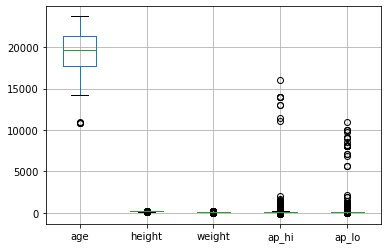

In [175]:
dataset[['age','height','weight', 'ap_hi', 'ap_lo']].boxplot()


plt.show()

## Feature Engineering

In [176]:
dataset['age'] = (dataset['age']/365).values.astype(int)

In [177]:
dataset['bmi'] = dataset['weight']/((dataset['height']/100)**2)

In [178]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [179]:
dataset.drop(['height','weight'] , axis=1, inplace =True)

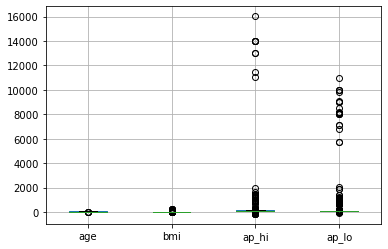

In [180]:
dataset[['age','bmi', 'ap_hi', 'ap_lo']].boxplot()


plt.show()

In [181]:
### Outlier Handling

In [182]:
data_numeric = dataset[['age','bmi', 'ap_hi', 'ap_lo']]

Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)

IQR = Q3 - Q1


In [183]:
out_rows = ((data_numeric < (Q1 - 1.5 *IQR)) | (data_numeric >(Q3 + 1.5*IQR))).any(axis=1)

In [184]:
dataset = dataset[~out_rows]

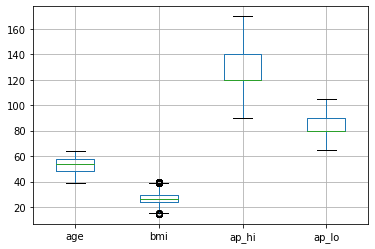

In [185]:
dataset[['age','bmi', 'ap_hi', 'ap_lo']].boxplot()


plt.show()

## Descriptive Analysis

In [186]:
dataset[['age','bmi', 'ap_hi', 'ap_lo']].describe()

,age,bmi,ap_hi,ap_lo
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,27.034727,126.404319,81.689537
std,6.746333,4.406103,14.296927,7.673500
min,39.000000,14.479500,90.000000,65.000000
25%,48.000000,23.875115,120.000000,80.000000
50%,54.000000,26.222222,120.000000,80.000000
75%,58.000000,29.757585,140.000000,90.000000
max,64.000000,39.736121,170.000000,105.000000


In [187]:
dataset['cardio'].value_counts()

0    31783
1    30962
Name: cardio, dtype: int64

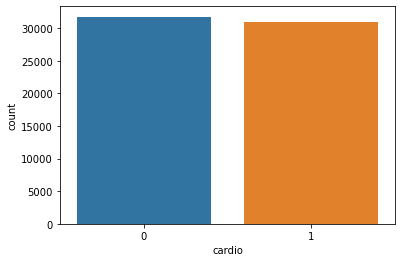

In [188]:
sns.countplot(data = dataset , x='cardio')

plt.show()

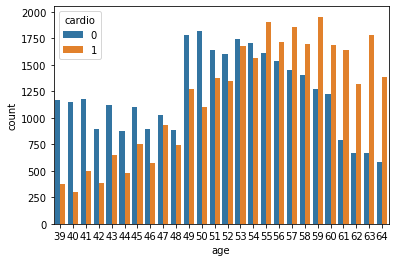

In [189]:
sns.countplot(data = dataset , x='age' , hue ='cardio')

plt.show()

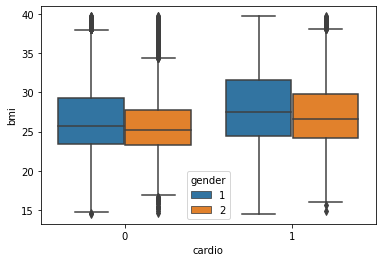

In [190]:
sns.boxplot(data= dataset , x= 'cardio' , y= 'bmi' ,hue='gender')

plt.show()

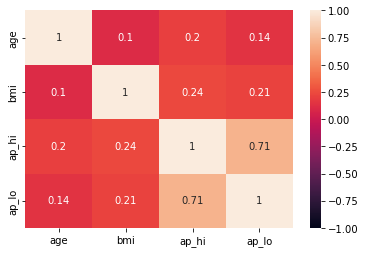

In [191]:
sns.heatmap(dataset[['age','bmi', 'ap_hi', 'ap_lo']].corr() , annot=True ,vmax=1,vmin=-1 )

plt.show()

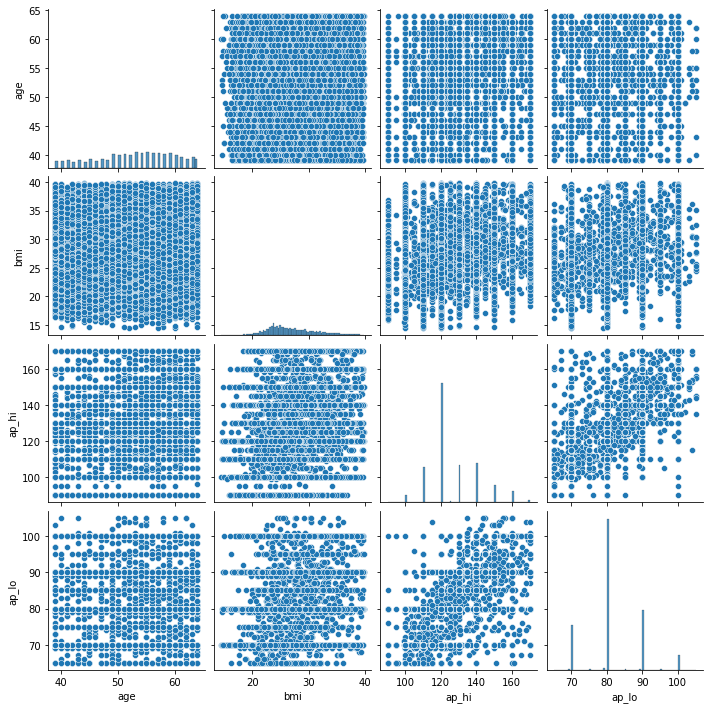

In [192]:
sns.pairplot(dataset[['age','bmi', 'ap_hi', 'ap_lo']])

plt.show()

In [193]:
df = dataset[['age','bmi', 'ap_hi', 'ap_lo']]

df['cardio'] = ['Yes'if row == 1 else 'No' for row in dataset['cardio']]

C:\Users\User\AppData\Local\Temp\ipykernel_20284\2906838896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cardio'] = ['Yes'if row == 1 else 'No' for row in dataset['cardio']]


In [194]:
df.head()

,age,bmi,ap_hi,ap_lo,cardio
0,50,21.967120,110,80,No
1,55,34.927679,140,90,Yes
2,51,23.507805,130,70,Yes
3,48,28.710479,150,100,Yes
5,60,29.384676,120,80,No


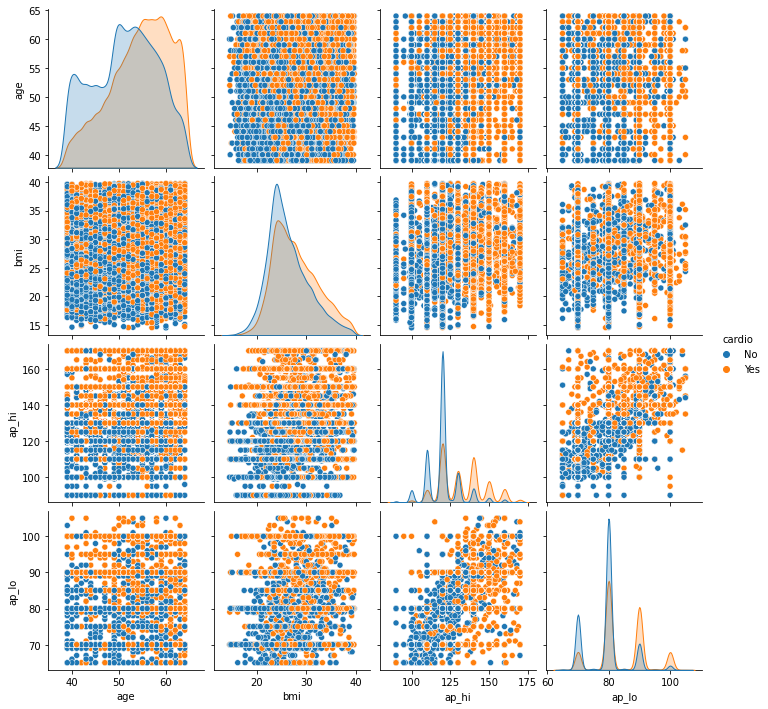

In [195]:
sns.pairplot(data =df ,hue ='cardio')

plt.show()

## Machine Learning Application

In [196]:
dataset.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676


In [197]:
dataset.columns

Index(['id', 'age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

In [198]:
dataset.drop('id' ,axis=1 , inplace =True)

In [199]:
dataset =dataset.reindex(columns = ['age', 'ap_hi', 'ap_lo','bmi', 'gender', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio' ])

In [200]:
cat = ['gender', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active']

for column in cat:
    print(column)
    print(dataset[column].value_counts())
    print('--------------------------------------------------------------------------------------------------------------------')

gender
1    40289
2    22456
Name: gender, dtype: int64
--------------------------------------------------------------------------------------------------------------------
cholesterol
1    47420
2     8257
3     7068
Name: cholesterol, dtype: int64
--------------------------------------------------------------------------------------------------------------------
gluc
1    53596
3     4714
2     4435
Name: gluc, dtype: int64
--------------------------------------------------------------------------------------------------------------------
smoke
0    57184
1     5561
Name: smoke, dtype: int64
--------------------------------------------------------------------------------------------------------------------
alco
0    59413
1     3332
Name: alco, dtype: int64
--------------------------------------------------------------------------------------------------------------------
active
1    50465
0    12280
Name: active, dtype: int64
---------------------------------------------------------

In [201]:
### Label Encoding for Gender

from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()



In [202]:
dataset['gender'] = le.fit_transform(dataset['gender'])
dataset.head(5)

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


### One Hot Encoding

In [203]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [204]:
ohot_encoded1 = ohe.fit_transform(dataset['cholesterol'].values.reshape(-1,1)).toarray()
ohot_encoded1 = ohot_encoded1[:,1:].astype(int)
df_ohot = pd.DataFrame(ohot_encoded1 ,columns= ['Above Nor Chol' , 'Well above Chol'])

In [205]:
df_ohot

,Above Nor Chol,Well above Chol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [206]:
ohot_encoded2 = ohe.fit_transform(dataset['gluc'].values.reshape(-1,1)).toarray()
ohot_encoded2 = ohot_encoded1[:,1:].astype(int)
df_ohot2 = pd.DataFrame(ohot_encoded1 ,columns= ['Above Nor gluc' , 'Well above gluc'])

In [207]:
df_ohot2.head()

,Above Nor gluc,Well above gluc
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0


In [208]:
dataset.reset_index(inplace=True)

In [209]:
X = pd.concat([dataset.iloc[:,:10],df_ohot ,df_ohot2 ],1)

C:\Users\User\AppData\Local\Temp\ipykernel_20284\3836857692.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X = pd.concat([dataset.iloc[:,:10],df_ohot ,df_ohot2 ],1)


In [210]:
X.drop('index',axis=1,inplace=True)

In [211]:
X.drop(['cholesterol','gluc'] ,axis=1 , inplace=True)

In [212]:
X.head()

,age,ap_hi,ap_lo,bmi,gender,smoke,alco,Above Nor Chol,Well above Chol,Above Nor gluc,Well above gluc
0,50,110,80,21.967120,1,0,0,0,0,0,0
1,55,140,90,34.927679,0,0,0,0,1,0,1
2,51,130,70,23.507805,0,0,0,0,1,0,1
3,48,150,100,28.710479,1,0,0,0,0,0,0
4,60,120,80,29.384676,0,0,0,1,0,1,0


In [213]:
X = X.values
Y = dataset.iloc[:,10].values

In [214]:
### Standerdizing

In [215]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [216]:
X[:,:4] = sc.fit_transform(X[:,:4])

### Train Test Split

In [217]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size=0.2, random_state=0)


In [218]:
y_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

## Modeling

In [219]:
## K nearest Neigbours

In [220]:
from sklearn.neighbors import KNeighborsClassifier

Knn =KNeighborsClassifier(n_neighbors=5 , p=2, metric='minkowski')
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [221]:
y_pred = Knn.predict(x_test)

In [222]:
np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1)

array([[1, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 1],
       [0, 0],
       [1, 1]], dtype=int64)

In [223]:
## Model Valuation

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))


[[ 170  647]
 [2251 9481]]
0.7690652641644753
              precision    recall  f1-score   support

           0       0.07      0.21      0.11       817
           1       0.94      0.81      0.87     11732

    accuracy                           0.77     12549
   macro avg       0.50      0.51      0.49     12549
weighted avg       0.88      0.77      0.82     12549



In [224]:
## Support Vector Classification

In [225]:
from sklearn.svm import SVC

svc_class = SVC(kernel='rbf')
svc_class.fit(x_train,y_train)

SVC()

In [226]:
y_pred = svc_class.predict(x_test)

In [227]:
np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1)

array([[1, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [228]:
## Model Valuation

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))


[[    0     0]
 [ 2421 10128]]
0.8070762610566579
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.81      0.89     12549

    accuracy                           0.81     12549
   macro avg       0.50      0.40      0.45     12549
weighted avg       1.00      0.81      0.89     12549



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
